In [2]:
cd drive/My\ Drive/mge511_preject/

/content/drive/My Drive/mge511_preject


In [0]:
import os
import sys
import json
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from gensim.models.word2vec import Word2Vec
sys.path.append(os.pardir)
from models.word_embedding import get_embedding_matrix

In [0]:
DATA_IN_PATH = './assets/data/npy_data/2020-05-31/'
DATA_OUT_PATH = './model_save/cnn_model/'
# Data save label
TRAIN_INPUT_DATA = 'train_input.npy'
TEST_INPUT_DATA = 'test_input.npy'
DATA_CONFIGS = 'data_configs.json'
SEQ_CONFIGS = 'seq_configs_bt.json'

# Train label save file name
TRAIN_LABEL_DATA = 'train_label.npy'
TRAIN_LABEL_SMALL = 'train_label_small.npy'
TEST_LABEL_DATA = 'test_label.npy'
TEST_LABEL_SMALL = 'test_label_small.npy'

In [0]:
from notebook_example.test_package.lstm_train import LSTMTrain

## Load pre-trained data

In [6]:
pre_trained_name = './model_save/embedding_model/trained_word2vec1.model'
pre_trained_w2v = Word2Vec.load(pre_trained_name)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [7]:
train_X = np.load(open(DATA_IN_PATH + TRAIN_INPUT_DATA, 'rb'))
train_Y = np.load(open(DATA_IN_PATH + TRAIN_LABEL_SMALL, 'rb'))
test_X = np.load(open(DATA_IN_PATH + TEST_INPUT_DATA, 'rb'))
test_Y = np.load(open(DATA_IN_PATH + TEST_LABEL_SMALL, 'rb'))
train_YS = tf.one_hot(train_Y, 455)
test_YS = tf.one_hot(test_Y, 455)
data_configs = json.load(open(DATA_IN_PATH + DATA_CONFIGS, 'r'))
vocab_size = data_configs['vocab_size'] + 1
print("vocab_size : ", vocab_size)
word_index = data_configs['vocab']

vocab_size :  30079


## 04. Bidirection LSTM pre-trained word2vec

### optimizer radam

In [8]:
lstm_train_pt_w2v = LSTMTrain(vocab_size=vocab_size, 
                            batch_size=128,
                            train_mode='pt',
                            output_dim=455,
                            pre_trained_mode='pt_w2v',
                            optimizer='radam',
                            word_index=word_index,
                            embedding_matrix=pre_trained_w2v
                            )

small_class
output_dim :  455
./model_save/rnn_model_small/
word index size :  30079
28173 1905
train_mode : pt, optimizer : radam, pre-trained_mode : pt_w2v, model_name : lstm_pt_radam_pt_w2v


In [9]:
model, histroy = lstm_train_pt_w2v.train(train_X, train_YS)

{'vocab_size': 30079, 'embedding_size': 300, 'dropout_rate': 0.5, 'lstm_dimension': 128, 'dense_dimension': 64, 'train_mode': 'pt', 'output_dimension': 455, 'model_name': 'lstm_pt_radam_pt_w2v', 'embedding_matrix': array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.1215607 ,  0.20265704, -0.1296849 , ..., -0.25743967,
        -0.44502595, -0.15552975],
       [-0.07061617,  0.60541958,  0.0075527 , ...,  0.00845565,
        -0.01567723, -0.02487615],
       ...,
       [-0.73014832,  0.27339637, -0.06521773, ..., -0.30837446,
         0.41687673, -0.36610672],
       [-0.78842098, -0.6107676 , -0.37505671, ...,  0.14378503,
        -0.27998501, -0.66035861],
       [-0.59498692,  0.02842285,  0.46921459, ..., -0.48162848,
        -0.31085017, -0.19220926]])}
./model_save/rnn_model_small/lstm_pt_radam_pt_w2v -- Folder already exists 

callback set
Epoch 1/1000
68/68 [==============================] - ETA: 0s - loss: 6.1166 - ac

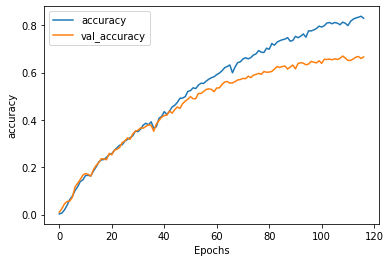

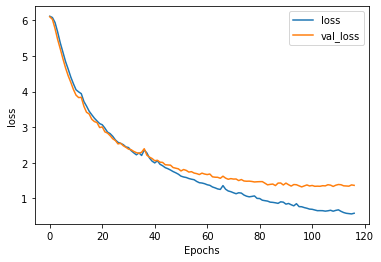

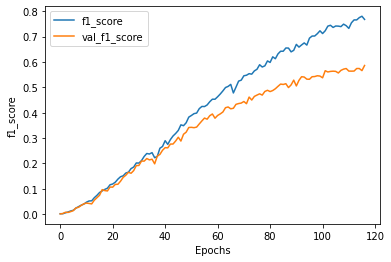

In [10]:
lstm_train_pt_w2v.train_plot(model, histroy)

In [11]:
lstm_train_pt_w2v.evaluation(model, test_X, test_YS)

145/145 [==============================] - 4s 26ms/step - loss: 1.3292 - accuracy: 0.6741 - f1_score: 0.5905
